<a href="https://colab.research.google.com/github/Alirs2002/tweet_sentiment_analysis/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this motherfucker project, i am going to create a model by keras,to classify tweets,to 2 classes

1-disaster

2-normal

lets import necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

now,lets download our dataset

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-10-10 15:55:47--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-10-10 15:55:47 (124 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!ls

nlp_getting_started.zip  sample_data


In [4]:
!ls ..

bin			    etc     media		      root  tools
boot			    home    mnt			      run   usr
content			    lib     NGC-DL-CONTAINER-LICENSE  sbin  var
cuda-keyring_1.0-1_all.deb  lib32   opt			      srv
datalab			    lib64   proc		      sys
dev			    libx32  python-apt		      tmp


now,lets create a function to unzip our data

In [5]:
import zipfile

def unzip_data(path):

  zip_file_ref = zipfile.ZipFile(path,"r")

  zip_file_ref.extractall()

  zip_file_ref.close()

In [6]:
zip_file_path = "./nlp_getting_started.zip"

In [7]:
unzip_data(zip_file_path)

In [8]:
!ls

nlp_getting_started.zip  sample_submission.csv	train.csv
sample_data		 test.csv


now,lets import our train and test datasets

In [9]:
train_data_path = "./train.csv"

test_data_path = "./test.csv"

In [10]:
train_data = pd.read_csv(train_data_path)

test_data = pd.read_csv(test_data_path)

In [11]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
pd.options.display.max_colwidth=200

In [13]:
train_data[:2][["text","target"]]

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1


In [14]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [16]:
print(len(train_data))

7613


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [18]:
pd.options.display.max_dir_items=200

In [19]:
train_data["keyword"].isnull().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [20]:
train_data[100:105]

,id,keyword,location,text,target
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad,1
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga,0
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/weQPesENku,0


i think ,location and keyword,doesnt have any influenct on our prediction,so we will remove them from our dataset in future

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_data = train_data.sample(frac=1,random_state=85)

In [23]:
train_data

,id,keyword,location,text,target
6039,8633,seismic,"Mogadishu, Somalia",Exploration Takes Seismic Shift in #Gabon to #Somalia\nhttp://t.co/Ltf6jL5keU http://t.co/Zlq8tHcTkW,1
1709,2465,collided,San Francisco,Mind blown by @GlassAnimals slithering viscous Gold Mine (cover of Yeah Yeah Yeahs + Erykah Badu)Û_ http://t.co/7Zb9gm5z0h,0
2775,3992,devastation,NaN,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/vFCtrzaOk2,1
2511,3607,desolation,"North East, England",Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1
5234,7480,obliteration,NaN,Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube,0
...,...,...,...,...,...
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/lEYJwNnAH8,1
1587,2292,cliff%20fall,"Lagos, Nigeria",Huge cliff landslide on road in China: Watch the moment a cliff collapses as huge chunks of rock fall onto a r... http://t.co/eEEwO207mX,1
5828,8321,rubble,Spain - China - Latin America.,China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this summer h... http://t.co/pE2R3lN16o by .Forbes,0
5280,7545,outbreak,Chile,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk,1


In [24]:
train_sentence,val_sentence,train_labels,val_labels = train_test_split(train_data["text"].to_numpy(),
                                                                       train_data["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=85)

In [25]:
len(train_sentence),len(train_labels),len(val_sentence),len(val_labels)

(6851, 6851, 762, 762)

In [26]:
train_sentence

array(['Insane bush fires in California. Be safe. https://t.co/jSlxTQ3NqS',
       '@beckyfeigin I defs will when it stops bleeding!',
       "I don't laugh out loud at many things. But man I really lol @ the big bang theory.",
       ...,
       'Only one man Tsutomi Yamaguchi is said to have survived both atomic bomb blasts at #Hiroshima and #Nagasaki. #OTD http://t.co/DaalPeNZp0',
       'Blue Bell May Be Close to a Return From Its Listeria Disaster... Hot on #theneeds #Recipes http://t.co/F56v61AmPt',
       '9:35 pm. Thunderstorm. No rain. 90 degrees. This weather weird.'],
      dtype=object)

now,we have created our training sentence

In [27]:
import random
def show_random(dataset1,dataset2):

  if(len(dataset1)!=len(dataset2)):
    return "fuck you,your fucking datasets are wrong"

  length = len(dataset1)

  random_num = random.randint(0,length)

  random_text = dataset1[random_num]
  random_label = dataset2[random_num]

  if(random_label ==1):
    random_label = "disaster"
  else:
    random_label = "normal"

  print(f"text: {random_text} \n label :{random_label}")

In [28]:
show_random(train_sentence,train_labels)

text: @allen_enbot If you mess up it's gonna explode... 
 label :disaster


ok,now we should do our next step which is converting our dataset to number

In [29]:
from tensorflow.keras.layers import TextVectorization

In [30]:
vocab_size = 20000

vectorizer = TextVectorization(max_tokens=vocab_size,
                               split="whitespace",
                               standardize="lower_and_strip_punctuation",
                               output_mode="int",
                               output_sequence_length=25)

now,we should adapt our vectorizer

In [31]:
vectorizer.adapt(train_sentence)

In [32]:
vectorizer.vocabulary_size()

20000

In [33]:
len(vectorizer.get_vocabulary())

20000

In [34]:
vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

all right,we have made our vocabulary

lets test it on a simple sentence

In [35]:
simple_sentence = "hello,did you know that zaza pachulia is the greatest player ever?"

simple_matrix = vectorizer(simple_sentence)

simple_matrix

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([   1,   12,   92,   16,    1,    1,    9,    2, 2090, 2009,  224,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])>

In [36]:
vectorizer.get_vocabulary()[9999]

'panik'

In [37]:
print(vectorizer("hello"))

tf.Tensor(
[1849    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)


now,lets create a word embedding layer

In [38]:
tf.random.set_seed(85)
from tensorflow.keras import layers

In [39]:
embedding_layer = layers.Embedding(output_dim = 128,
                                   embeddings_initializer="uniform",
                                   name="kir_khar",
                                   input_dim=vocab_size,
                                   )

In [40]:
type(embedding_layer)

keras.src.layers.core.embedding.Embedding

In [41]:
simple_embedding = embedding_layer(vectorizer(simple_sentence))
simple_embedding.shape,simple_embedding

(TensorShape([25, 128]),
 <tf.Tensor: shape=(25, 128), dtype=float32, numpy=
 array([[-0.04495201, -0.0344975 , -0.02582169, ..., -0.00716541,
          0.04351156,  0.01954195],
        [ 0.04133829,  0.02867248, -0.02185245, ..., -0.01577201,
         -0.03214873, -0.01620131],
        [-0.0404963 ,  0.04459867, -0.00767633, ...,  0.02159332,
         -0.04562512,  0.0150832 ],
        ...,
        [-0.00167416,  0.03749713, -0.036105  , ..., -0.01711414,
          0.01166083,  0.00956291],
        [-0.00167416,  0.03749713, -0.036105  , ..., -0.01711414,
          0.01166083,  0.00956291],
        [-0.00167416,  0.03749713, -0.036105  , ..., -0.01711414,
          0.01166083,  0.00956291]], dtype=float32)>)

now,lets finally create our fucking model

In [42]:

input_layer = tf.keras.layers.Input(shape=(1,),dtype="string")
x= vectorizer(input_layer)
x= embedding_layer(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x=tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_1 = tf.keras.Model(input_layer,x)


now,lets compile our model

In [43]:
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [44]:
model_1_history = model_1.fit(train_sentence,
                               train_labels,
                               epochs=20,
                               validation_data=(val_sentence,val_labels))

Epoch 1/20
215/215 [==============================] - 26s 93ms/step - loss: 0.6367 - accuracy: 0.6485 - val_loss: 0.5612 - val_accuracy: 0.7717
Epoch 2/20
215/215 [==============================] - 4s 18ms/step - loss: 0.4740 - accuracy: 0.8145 - val_loss: 0.4659 - val_accuracy: 0.7927
Epoch 3/20
215/215 [==============================] - 3s 13ms/step - loss: 0.3560 - accuracy: 0.8704 - val_loss: 0.4295 - val_accuracy: 0.8005
Epoch 4/20
215/215 [==============================] - 3s 13ms/step - loss: 0.2753 - accuracy: 0.9032 - val_loss: 0.4249 - val_accuracy: 0.8058
Epoch 5/20
215/215 [==============================] - 2s 8ms/step - loss: 0.2148 - accuracy: 0.9296 - val_loss: 0.4248 - val_accuracy: 0.8176
Epoch 6/20
215/215 [==============================] - 2s 8ms/step - loss: 0.1691 - accuracy: 0.9467 - val_loss: 0.4384 - val_accuracy: 0.8202
Epoch 7/20
215/215 [==============================] - 2s 9ms/step - loss: 0.1335 - accuracy: 0.9588 - val_loss: 0.4533 - val_accuracy: 0.8084
E

it looke like,5 epochs was enough and we just increased our overfit

so lets evaluate on our test dataset

so,lets first create our dataset

In [45]:
train_data

,id,keyword,location,text,target
6039,8633,seismic,"Mogadishu, Somalia",Exploration Takes Seismic Shift in #Gabon to #Somalia\nhttp://t.co/Ltf6jL5keU http://t.co/Zlq8tHcTkW,1
1709,2465,collided,San Francisco,Mind blown by @GlassAnimals slithering viscous Gold Mine (cover of Yeah Yeah Yeahs + Erykah Badu)Û_ http://t.co/7Zb9gm5z0h,0
2775,3992,devastation,NaN,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/vFCtrzaOk2,1
2511,3607,desolation,"North East, England",Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1
5234,7480,obliteration,NaN,Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube,0
...,...,...,...,...,...
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/lEYJwNnAH8,1
1587,2292,cliff%20fall,"Lagos, Nigeria",Huge cliff landslide on road in China: Watch the moment a cliff collapses as huge chunks of rock fall onto a r... http://t.co/eEEwO207mX,1
5828,8321,rubble,Spain - China - Latin America.,China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this summer h... http://t.co/pE2R3lN16o by .Forbes,0
5280,7545,outbreak,Chile,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk,1


In [46]:
import matplotlib.pyplot as plt

<Axes: >

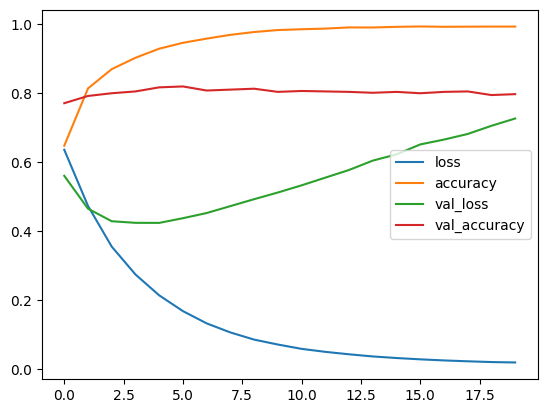

In [47]:
pd.DataFrame(model_1_history.history).plot()

now,lets examine another model to see if increasing the volume of dense layer have any effect

In [48]:
model_2_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=128,
                                              mask_zero=True,
                                              embeddings_initializer="uniform",
                                              name="kir_asb")

In [49]:
input_model_2 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_2)
x = model_2_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
output_2 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_2 = tf.keras.Model(input_model_2,output_2)

In [50]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [51]:
model_2_history = model_2.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 15s - loss: 0.5358 - accuracy: 0.7403 - val_loss: 0.4138 - val_accuracy: 0.8202 - 15s/epoch - 69ms/step
Epoch 2/10
215/215 - 3s - loss: 0.2721 - accuracy: 0.8945 - val_loss: 0.4687 - val_accuracy: 0.8084 - 3s/epoch - 13ms/step
Epoch 3/10
215/215 - 2s - loss: 0.1269 - accuracy: 0.9558 - val_loss: 0.6160 - val_accuracy: 0.7927 - 2s/epoch - 10ms/step
Epoch 4/10
215/215 - 2s - loss: 0.0635 - accuracy: 0.9790 - val_loss: 0.7978 - val_accuracy: 0.7822 - 2s/epoch - 9ms/step
Epoch 5/10
215/215 - 2s - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.8658 - val_accuracy: 0.7822 - 2s/epoch - 9ms/step
Epoch 6/10
215/215 - 1s - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.9003 - val_accuracy: 0.7782 - 1s/epoch - 6ms/step
Epoch 7/10
215/215 - 1s - loss: 0.0227 - accuracy: 0.9930 - val_loss: 1.0181 - val_accuracy: 0.7769 - 1s/epoch - 7ms/step
Epoch 8/10
215/215 - 1s - loss: 0.0200 - accuracy: 0.9931 - val_loss: 1.0033 - val_accuracy: 0.7822 - 1s/epoch - 6ms/step
Epoch 9/10
215/215 

<Axes: >

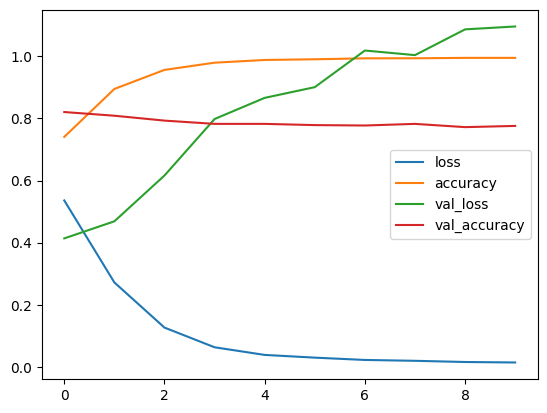

In [52]:
pd.DataFrame(model_2_history.history).plot()

Iknow,it was terrible

lets see if we can imporve if we add another dnse layer

In [53]:
model_3_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=256,
                                              mask_zero=True,
                                              name="kir_ensan")

In [54]:
input_model_3 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_3)
x = model_3_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
output_3 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_3 = tf.keras.Model(input_model_3,output_3)

In [55]:
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [56]:
model_3_history = model_3.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 21s - loss: 0.5243 - accuracy: 0.7495 - val_loss: 0.4147 - val_accuracy: 0.8268 - 21s/epoch - 96ms/step
Epoch 2/10
215/215 - 4s - loss: 0.2573 - accuracy: 0.8994 - val_loss: 0.4860 - val_accuracy: 0.8058 - 4s/epoch - 17ms/step
Epoch 3/10
215/215 - 3s - loss: 0.1160 - accuracy: 0.9572 - val_loss: 0.6460 - val_accuracy: 0.7979 - 3s/epoch - 13ms/step
Epoch 4/10
215/215 - 3s - loss: 0.0592 - accuracy: 0.9785 - val_loss: 0.8549 - val_accuracy: 0.7808 - 3s/epoch - 14ms/step
Epoch 5/10
215/215 - 2s - loss: 0.0333 - accuracy: 0.9880 - val_loss: 0.9236 - val_accuracy: 0.7822 - 2s/epoch - 11ms/step
Epoch 6/10
215/215 - 2s - loss: 0.0247 - accuracy: 0.9883 - val_loss: 1.0109 - val_accuracy: 0.7822 - 2s/epoch - 10ms/step
Epoch 7/10
215/215 - 3s - loss: 0.0208 - accuracy: 0.9926 - val_loss: 1.1084 - val_accuracy: 0.7822 - 3s/epoch - 14ms/step
Epoch 8/10
215/215 - 3s - loss: 0.0162 - accuracy: 0.9939 - val_loss: 1.1300 - val_accuracy: 0.7756 - 3s/epoch - 13ms/step
Epoch 9/10
215

<Axes: >

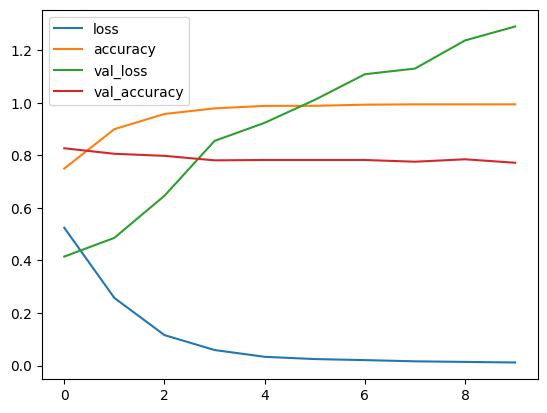

In [57]:
pd.DataFrame(model_3_history.history).plot()

it wasnt good again,

so,lets use our last weapon in dense model

adding another fucking layer :))

In [58]:
model_4_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=256,
                                              mask_zero=True,
                                              name="kiri")

In [59]:
input_model_4 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_4)
x = model_4_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
output_4 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_4 = tf.keras.Model(input_model_4,output_4)

In [60]:
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [61]:
model_4_history = model_4.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 20s - loss: 0.5144 - accuracy: 0.7491 - val_loss: 0.4197 - val_accuracy: 0.8215 - 20s/epoch - 93ms/step
Epoch 2/10
215/215 - 4s - loss: 0.2463 - accuracy: 0.9038 - val_loss: 0.5100 - val_accuracy: 0.8018 - 4s/epoch - 18ms/step
Epoch 3/10
215/215 - 2s - loss: 0.1054 - accuracy: 0.9604 - val_loss: 0.7503 - val_accuracy: 0.7874 - 2s/epoch - 11ms/step
Epoch 4/10
215/215 - 2s - loss: 0.0524 - accuracy: 0.9785 - val_loss: 0.9991 - val_accuracy: 0.7743 - 2s/epoch - 10ms/step
Epoch 5/10
215/215 - 2s - loss: 0.0305 - accuracy: 0.9870 - val_loss: 1.2505 - val_accuracy: 0.7743 - 2s/epoch - 9ms/step
Epoch 6/10
215/215 - 2s - loss: 0.0241 - accuracy: 0.9885 - val_loss: 1.3758 - val_accuracy: 0.7756 - 2s/epoch - 8ms/step
Epoch 7/10
215/215 - 2s - loss: 0.0155 - accuracy: 0.9918 - val_loss: 1.5918 - val_accuracy: 0.7572 - 2s/epoch - 8ms/step
Epoch 8/10
215/215 - 2s - loss: 0.0149 - accuracy: 0.9924 - val_loss: 1.9014 - val_accuracy: 0.7677 - 2s/epoch - 8ms/step
Epoch 9/10
215/215

<Axes: >

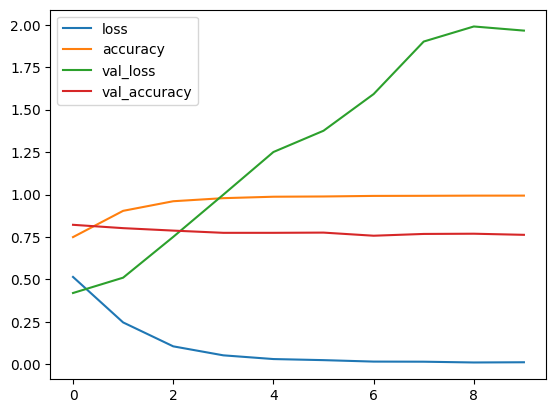

In [62]:
pd.DataFrame(model_4_history.history).plot()

its not working anymore

lets try to work with rnn models

we will start with our famout LSTM(long_short term memory)

In [63]:
tf.random.set_seed(85)

In [64]:
model_5_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim = 128 ,
                                              mask_zero=True,
                                              name="kiri1")

In [65]:
input_model_5 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_5)
x = model_5_embedding(x)
print(x.shape)
x = tf.keras.layers.LSTM(64)(x)
output_5 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_5 = tf.keras.Model(input_model_5,output_5)

(None, 25, 128)


In [66]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [67]:
model_5_history = model_5.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 28s - loss: 0.5076 - accuracy: 0.7625 - val_loss: 0.4410 - val_accuracy: 0.8202 - 28s/epoch - 128ms/step
Epoch 2/10
215/215 - 4s - loss: 0.2548 - accuracy: 0.9010 - val_loss: 0.4673 - val_accuracy: 0.7927 - 4s/epoch - 20ms/step
Epoch 3/10
215/215 - 4s - loss: 0.1073 - accuracy: 0.9616 - val_loss: 0.5664 - val_accuracy: 0.7874 - 4s/epoch - 20ms/step
Epoch 4/10
215/215 - 3s - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.6947 - val_accuracy: 0.7822 - 3s/epoch - 12ms/step
Epoch 5/10
215/215 - 2s - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.7560 - val_accuracy: 0.7743 - 2s/epoch - 10ms/step
Epoch 6/10
215/215 - 2s - loss: 0.0264 - accuracy: 0.9907 - val_loss: 0.8630 - val_accuracy: 0.7835 - 2s/epoch - 10ms/step
Epoch 7/10
215/215 - 3s - loss: 0.0192 - accuracy: 0.9930 - val_loss: 1.0375 - val_accuracy: 0.7808 - 3s/epoch - 12ms/step
Epoch 8/10
215/215 - 3s - loss: 0.0165 - accuracy: 0.9930 - val_loss: 1.2105 - val_accuracy: 0.7743 - 3s/epoch - 14ms/step
Epoch 9/10
21

its not working again

i am tired :((

<Axes: >

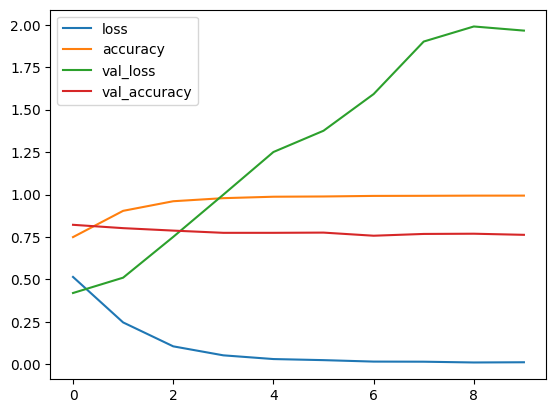

In [68]:
pd.DataFrame(model_4_history.history).plot()

lets add another lstm cell layer

In [69]:
model_6_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=128,
                                              name="kk",
                                              mask_zero=True)

In [70]:
input_model_6 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_model_6)
x = model_6_embedding(x)
print(x.shape)
x = tf.keras.layers.LSTM(128,return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
output_6 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_6 = tf.keras.Model(input_model_6,output_6)

(None, 25, 128)


In [71]:
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [72]:
model_6_history = model_6.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 44s - loss: 0.5055 - accuracy: 0.7612 - val_loss: 0.4241 - val_accuracy: 0.8228 - 44s/epoch - 203ms/step
Epoch 2/10
215/215 - 7s - loss: 0.2568 - accuracy: 0.9015 - val_loss: 0.4584 - val_accuracy: 0.8097 - 7s/epoch - 33ms/step
Epoch 3/10
215/215 - 6s - loss: 0.1071 - accuracy: 0.9625 - val_loss: 0.5963 - val_accuracy: 0.7927 - 6s/epoch - 29ms/step
Epoch 4/10
215/215 - 5s - loss: 0.0592 - accuracy: 0.9823 - val_loss: 0.7059 - val_accuracy: 0.7848 - 5s/epoch - 24ms/step
Epoch 5/10
215/215 - 7s - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.7483 - val_accuracy: 0.7703 - 7s/epoch - 32ms/step
Epoch 6/10
215/215 - 5s - loss: 0.0278 - accuracy: 0.9893 - val_loss: 1.1022 - val_accuracy: 0.7402 - 5s/epoch - 25ms/step
Epoch 7/10
215/215 - 4s - loss: 0.0209 - accuracy: 0.9924 - val_loss: 0.9642 - val_accuracy: 0.7651 - 4s/epoch - 18ms/step
Epoch 8/10
215/215 - 5s - loss: 0.0135 - accuracy: 0.9933 - val_loss: 1.2107 - val_accuracy: 0.7717 - 5s/epoch - 25ms/step
Epoch 9/10
21

it got worse

<Axes: >

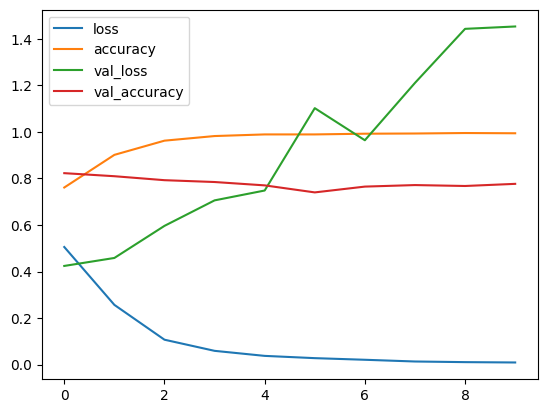

In [73]:
pd.DataFrame(model_6_history.history).plot()

i think it is time to start using gru cells to see if we can achieve any improvement

In [74]:
model_7_embedding = tf.keras.layers.Embedding(input_dim = vocab_size,
                                              output_dim=128,
                                              mask_zero=True,
                                              name="kiri_7",
                                              embeddings_initializer="uniform")

In [75]:
input_model_7 = tf.keras.layers.Input(shape=(1,),dtype="string")

x = vectorizer(input_model_7)
x = model_7_embedding(x)
x = tf.keras.layers.GRU(128,return_sequences=True)(x)
x = tf.keras.layers.GRU(64)(x)
x = tf.keras.layers.Dense(64,activation=tf.keras.activations.relu)(x)
output_7 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)


model_7 = tf.keras.Model(input_model_7,output_7)

In [76]:
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [77]:
model_7_history = model_7.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 27s - loss: 0.5117 - accuracy: 0.7532 - val_loss: 0.4268 - val_accuracy: 0.8123 - 27s/epoch - 126ms/step
Epoch 2/10
215/215 - 8s - loss: 0.2480 - accuracy: 0.9015 - val_loss: 0.4796 - val_accuracy: 0.7953 - 8s/epoch - 38ms/step
Epoch 3/10
215/215 - 7s - loss: 0.0984 - accuracy: 0.9654 - val_loss: 0.6390 - val_accuracy: 0.7927 - 7s/epoch - 32ms/step
Epoch 4/10
215/215 - 6s - loss: 0.0515 - accuracy: 0.9854 - val_loss: 0.8226 - val_accuracy: 0.7782 - 6s/epoch - 29ms/step
Epoch 5/10
215/215 - 6s - loss: 0.0368 - accuracy: 0.9898 - val_loss: 0.7463 - val_accuracy: 0.7887 - 6s/epoch - 26ms/step
Epoch 6/10
215/215 - 4s - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.9159 - val_accuracy: 0.7795 - 4s/epoch - 20ms/step
Epoch 7/10
215/215 - 6s - loss: 0.0177 - accuracy: 0.9943 - val_loss: 1.0556 - val_accuracy: 0.7651 - 6s/epoch - 26ms/step
Epoch 8/10
215/215 - 6s - loss: 0.0113 - accuracy: 0.9940 - val_loss: 1.2549 - val_accuracy: 0.7690 - 6s/epoch - 28ms/step
Epoch 9/10
21

fuckkkk

i dont know why mo model is getting worse,whenever i try to train it

lets use bidirectionality for our model to see if we can improve our model

In [78]:
tf.random.set_seed(85)  # 85 is my favorite number

In [79]:
model_8_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=128,
                                              name="zaaz",
                                              mask_zero=True,
                                              embeddings_initializer="uniform")

In [80]:
input_model_8 = tf.keras.layers.Input(shape=(1,), dtype="string")

x = vectorizer(input_model_8)
x = model_8_embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
x = tf.keras.layers.Dense(64,activation=tf.keras.activations.relu)(x)
output_8 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_8 = tf.keras.Model(input_model_8,output_8)

In [81]:
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [82]:
model_8_history = model_8.fit(train_sentence,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/5
215/215 - 28s - loss: 0.5095 - accuracy: 0.7489 - val_loss: 0.4105 - val_accuracy: 0.8228 - 28s/epoch - 129ms/step
Epoch 2/5
215/215 - 6s - loss: 0.2405 - accuracy: 0.9059 - val_loss: 0.4760 - val_accuracy: 0.7927 - 6s/epoch - 29ms/step
Epoch 3/5
215/215 - 6s - loss: 0.0933 - accuracy: 0.9664 - val_loss: 0.6100 - val_accuracy: 0.7835 - 6s/epoch - 27ms/step
Epoch 4/5
215/215 - 3s - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.8302 - val_accuracy: 0.7782 - 3s/epoch - 16ms/step
Epoch 5/5
215/215 - 3s - loss: 0.0208 - accuracy: 0.9921 - val_loss: 0.7762 - val_accuracy: 0.7690 - 3s/epoch - 14ms/step


<Axes: >

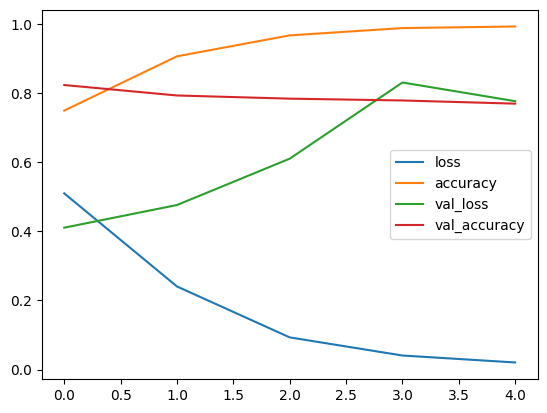

In [83]:
import pandas as pd

pd.DataFrame(model_8_history.history).plot()

In [84]:
model_8.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 25)                0         
 ctorization)                                                    
                                                                 
 zaaz (Embedding)            (None, 25, 128)           2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65  

it is not working

it looks like that our datasets maximum accuracy is about 80 percent and we can not pass it

lets use my last weapon,beside transfer learning ,which is convolutinal models

In [85]:
model_9_embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                              output_dim=128,
                                              name="kobe",
                                              mask_zero=True,
                                              embeddings_initializer="uniform")

In [86]:
input_model_9 = tf.keras.layers.Input(shape=(1,), dtype="string")

x = vectorizer(input_model_9)
x = model_9_embedding(x)
# here we should use convolutional layer
x = tf.keras.layers.Conv1D(filters=32,kernel_size=4,activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(16,activation=tf.keras.activations.relu)(x)
output_9 = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model_9 = tf.keras.Model(input_model_9,output_9)

In [87]:
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [88]:
model_9_history = model_9.fit(train_sentence,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/5
215/215 - 21s - loss: 0.5906 - accuracy: 0.6830 - val_loss: 0.4374 - val_accuracy: 0.8123 - 21s/epoch - 98ms/step
Epoch 2/5
215/215 - 3s - loss: 0.3159 - accuracy: 0.8749 - val_loss: 0.4264 - val_accuracy: 0.8110 - 3s/epoch - 14ms/step
Epoch 3/5
215/215 - 3s - loss: 0.1300 - accuracy: 0.9562 - val_loss: 0.5037 - val_accuracy: 0.8163 - 3s/epoch - 14ms/step
Epoch 4/5
215/215 - 2s - loss: 0.0526 - accuracy: 0.9854 - val_loss: 0.5940 - val_accuracy: 0.8031 - 2s/epoch - 8ms/step
Epoch 5/5
215/215 - 1s - loss: 0.0301 - accuracy: 0.9914 - val_loss: 0.6564 - val_accuracy: 0.8058 - 1s/epoch - 6ms/step


<Axes: >

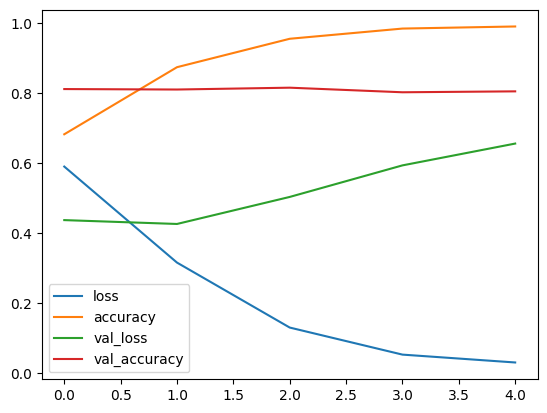

In [89]:
pd.DataFrame(model_9_history.history).plot()

In [90]:
model_9.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 25)                0         
 ctorization)                                                    
                                                                 
 kobe (Embedding)            (None, 25, 128)           2560000   
                                                                 
 conv1d (Conv1D)             (None, 22, 32)            16416     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_14 (Dense)            (None, 16)                528 

i think it is time to use our last and the strongest model,which is transfer learning,with pretrained embedding

i will use universal sentence encoder

In [91]:
import tensorflow_hub as hub

In [92]:
embed_link = "https://tfhub.dev/google/universal-sentence-encoder/4"

sentence_encoder_layer = hub.KerasLayer(embed_link,
                                        input_shape=[],
                                        name="kiri_last",
                                        trainable=False,
                                        dtype="string")

i will use sequential API for this model(instead of functional API)

In [93]:
model_10 = tf.keras.Sequential(name="zaza_pachulia")

model_10.add(sentence_encoder_layer)
model_10.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu))
model_10.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))



In [94]:
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 metrics=["accuracy"],
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [95]:
model_10.summary()

Model: "zaza_pachulia"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 kiri_last (KerasLayer)      (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [96]:
model_10_history = model_10.fit(train_sentence,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/10
215/215 - 8s - loss: 0.5069 - accuracy: 0.7867 - val_loss: 0.4214 - val_accuracy: 0.8084 - 8s/epoch - 38ms/step
Epoch 2/10
215/215 - 3s - loss: 0.4176 - accuracy: 0.8156 - val_loss: 0.4137 - val_accuracy: 0.8150 - 3s/epoch - 12ms/step
Epoch 3/10
215/215 - 2s - loss: 0.4043 - accuracy: 0.8212 - val_loss: 0.4132 - val_accuracy: 0.8176 - 2s/epoch - 12ms/step
Epoch 4/10
215/215 - 3s - loss: 0.3953 - accuracy: 0.8259 - val_loss: 0.4136 - val_accuracy: 0.8241 - 3s/epoch - 16ms/step
Epoch 5/10
215/215 - 4s - loss: 0.3881 - accuracy: 0.8343 - val_loss: 0.4135 - val_accuracy: 0.8176 - 4s/epoch - 17ms/step
Epoch 6/10
215/215 - 4s - loss: 0.3834 - accuracy: 0.8348 - val_loss: 0.4134 - val_accuracy: 0.8163 - 4s/epoch - 21ms/step
Epoch 7/10
215/215 - 6s - loss: 0.3773 - accuracy: 0.8383 - val_loss: 0.4106 - val_accuracy: 0.8176 - 6s/epoch - 27ms/step
Epoch 8/10
215/215 - 5s - loss: 0.3707 - accuracy: 0.8415 - val_loss: 0.4108 - val_accuracy: 0.8228 - 5s/epoch - 21ms/step
Epoch 9/10
215/2

with feature extractor model,we could achieve 82 percent

lets see what will happen,if we set our trainable parameter of our keras layer to "True"

In [97]:
embed_link = "https://tfhub.dev/google/universal-sentence-encoder/4"

sentence_encoder_layer_2 = hub.KerasLayer(embed_link,
                                          trainable=True,
                                          input_shape=[],
                                          dtype="string",
                                          name="hashem_sag-sefat")

In [98]:
model_11 = tf.keras.Sequential(name="please_work")

model_11.add(sentence_encoder_layer_2)
model_11.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu))
model_11.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [99]:
model_11.summary()

Model: "please_work"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hashem_sag-sefat (KerasLay  (None, 512)               256797824 
 er)                                                             
                                                                 
 dense_18 (Dense)            (None, 64)                32832     
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 256830721 (979.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                 metrics="accuracy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

as you can see,we have a lot of trainable parameters

In [101]:
model_11_history = model_11.fit(train_sentence,
                              train_labels,
                              epochs=7,
                              validation_data=(val_sentence,val_labels),
                              verbose = 2)

Epoch 1/7
215/215 - 228s - loss: 0.4516 - accuracy: 0.8032 - val_loss: 0.3926 - val_accuracy: 0.8346 - 228s/epoch - 1s/step
Epoch 2/7
215/215 - 41s - loss: 0.2272 - accuracy: 0.9153 - val_loss: 0.4572 - val_accuracy: 0.8176 - 41s/epoch - 191ms/step
Epoch 3/7
215/215 - 30s - loss: 0.0826 - accuracy: 0.9730 - val_loss: 0.5133 - val_accuracy: 0.8018 - 30s/epoch - 142ms/step
Epoch 4/7
215/215 - 37s - loss: 0.0458 - accuracy: 0.9834 - val_loss: 0.5956 - val_accuracy: 0.8163 - 37s/epoch - 174ms/step
Epoch 5/7
215/215 - 23s - loss: 0.0335 - accuracy: 0.9882 - val_loss: 0.5835 - val_accuracy: 0.7992 - 23s/epoch - 108ms/step
Epoch 6/7
215/215 - 23s - loss: 0.0230 - accuracy: 0.9901 - val_loss: 0.6988 - val_accuracy: 0.7690 - 23s/epoch - 108ms/step
Epoch 7/7
215/215 - 25s - loss: 0.0168 - accuracy: 0.9928 - val_loss: 0.7064 - val_accuracy: 0.8031 - 25s/epoch - 114ms/step


it looks like our models arent as powerfull to achieve higher accuracy,

so,lets ensemble them together,to see if we can find a better model

In [102]:
model_11.predict(["we will be dead by this explosion"])

1/1 [==============================] - 0s 421ms/step


array([[0.956121]], dtype=float32)

now,as we can see,we have 11 models and they are not working very well to be honest,

i think,the best model will be achieved,if we do voting with these 11 models

In [108]:
def prediction(list):

  prediction_length = len(list)
  pred_list = []
  models = []
  pred_model_1 = np.round(model_1.predict(list))
  pred_model_2 = np.round(model_2.predict(list))
  pred_model_3 = np.round(model_3.predict(list))
  pred_model_4 = np.round(model_4.predict(list))
  pred_model_5 = np.round(model_5.predict(list))
  pred_model_6 = np.round(model_6.predict(list))
  pred_model_7 = np.round(model_7.predict(list))
  pred_model_8 = np.round(model_8.predict(list))
  pred_model_9 = np.round(model_9.predict(list))
  pred_model_10 = np.round(model_10.predict(list))
  pred_model_11 = np.round(model_11.predict(list))
  models.append(pred_model_1)
  models.append(pred_model_2)
  models.append(pred_model_3)
  models.append(pred_model_4)
  models.append(pred_model_5)
  models.append(pred_model_6)
  models.append(pred_model_7)
  models.append(pred_model_8)
  models.append(pred_model_9)
  models.append(pred_model_10)
  models.append(pred_model_11)

  for i in range(prediction_length):
    count_1 = 0
    for j in models:
      if j[i]==1:
        count_1 = count_1 + 1
    if count_1>5:
      pred_list.append(1)
    else:
      pred_list.append(0)

  return pred_list


In [114]:
prediction(["hello","this earthquake is deadly"])

1/1 [==============================] - 0s 37ms/step


[0, 1]

In [105]:
np.round([0.23,0.7])

array([0., 1.])